## Quick Start Tutorial - Distinctiveness Centrality (Python)
**More info here https://github.com/iandreafc/distinctiveness**

### Installation
``` python
pip install -U distinctiveness
```

In [1]:
# Import distinctiveness
from distinctiveness.dc import distinctiveness

#Import Networkx and Pandas
import networkx as nx
import pandas as pd

### Undirected graphs

{('A', 'E'): Text(0.7868557811635424, 0.30578341344823273, '5'),
 ('A', 'B'): Text(0.19871643036289516, 0.12625193736290974, '2'),
 ('B', 'F'): Text(-0.29818482112784916, 0.20120164712278646, '5'),
 ('B', 'C'): Text(-0.40416896021349213, -0.20821990375660082, '2'),
 ('B', 'D'): Text(-0.26078070142349546, -0.28866051705288226, '2'),
 ('C', 'D'): Text(-0.4886709600356931, -0.5069850605710194, '5')}

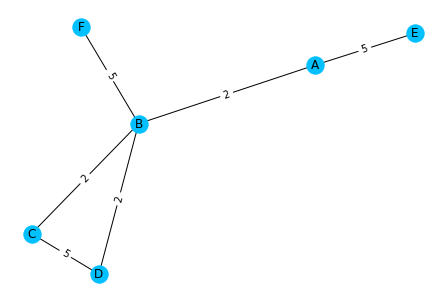

In [2]:
#Create a Toy Network
G= nx.Graph()
G.add_edge("A","E", weight = 5)
G.add_edge("A","B", weight = 2)
G.add_edge("B","F", weight = 5)
G.add_edge("B","C", weight = 2)
G.add_edge("B","D", weight = 2)
G.add_edge("C","D", weight = 5)
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G,pos=pos,with_labels = True,node_color='#00c0ff')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [3]:
#Calculate the 5 metrics of Distinctiveness Centrality
#alpha is a coefficient that can be increased to penalize more connections with high-degree nodes, default is alpha = 1
DC = distinctiveness(G, alpha = 1, normalize = False, measures = ["D1","D2","D3","D4","D5"])
DC

{'D1': {'A': 3.688670047696207,
  'E': 1.989700043360188,
  'B': 5.88249007371232,
  'F': 0.4845500650402821,
  'C': 2.183520069376301,
  'D': 2.183520069376301},
 'D2': {'A': 0.7958800173440753,
  'E': 0.3979400086720376,
  'B': 1.8927900303521317,
  'F': 0.09691001300805642,
  'C': 0.494850021680094,
  'D': 0.494850021680094},
 'D3': {'A': 7.255535063137435,
  'E': 4.225490200071284,
  'B': 9.875504739771252,
  'F': 2.385606273598312,
  'C': 4.869928789539122,
  'D': 4.869928789539122},
 'D4': {'A': 5.363636363636363,
  'E': 3.5714285714285716,
  'B': 6.7142857142857135,
  'F': 2.2727272727272725,
  'C': 3.9350649350649354,
  'D': 3.9350649350649354},
 'D5': {'A': 1.25, 'E': 0.5, 'B': 2.5, 'F': 0.25, 'C': 0.75, 'D': 0.75}}

In [4]:
#We can select only some measures and convert results into a pandas data frame
DC = distinctiveness(G, alpha = 1, normalize = False, measures = ["D1","D2"])
DC = pd.DataFrame(DC).sort_index()
DC

,D1,D2
A,3.68867,0.79588
B,5.88249,1.89279
C,2.18352,0.49485
D,2.18352,0.49485
E,1.98970,0.39794
F,0.48455,0.09691


When alpha > 1, negative values are possible.

In [5]:
#Compute distinctiveness with alpha > 1
DC = distinctiveness(G, alpha = 2, normalize = False, measures = ["D1","D2","D3","D4","D5"])
DC = pd.DataFrame(DC).sort_index()
DC

,D1,D2,D3,D4,D5
A,2.48455,0.19382,6.192577,5.216216,1.0625
B,4.07631,0.98970,6.054572,5.827586,1.7500
C,-0.52575,-0.40824,2.697727,4.526561,0.3125
D,-0.52575,-0.40824,2.697727,4.526561,0.3125
E,0.48455,0.09691,3.116246,4.310345,0.2500
F,-2.52575,-0.50515,1.041380,3.378378,0.0625


It is possible to specify a different value of alpha for each of the metrics.

In [6]:
DC = distinctiveness(G, alpha = [1, 2, 3, 4, 5], normalize = False, measures = ["D1","D2","D3","D4","D5"])
DC = pd.DataFrame(DC).sort_index()
DC

,D1,D2,D3,D4,D5
A,3.68867,0.19382,4.950958,5.047548,1.000977
B,5.88249,0.98970,1.942189,5.149766,1.093750
C,2.18352,-0.40824,0.179746,4.922743,0.032227
D,2.18352,-0.40824,0.179746,4.922743,0.032227
E,1.98970,0.09691,1.839884,4.875195,0.031250
F,0.48455,-0.50515,-0.378604,4.643388,0.000977


Metrics can be normalized to allow a comparison between different networks.

In [7]:
#When alpha > 1 negative values are possible
DC = distinctiveness(G, alpha = 2, normalize = True, measures = ["D1","D2","D3","D4","D5"])

#Select one metric
D1 = DC["D1"]
D1

WARNING. Normalization of D3 is carried out using loose upper and lower bounds.


{'A': 0.5710917507082571,
 'E': 0.5138646883853214,
 'B': 0.6166376260623857,
 'F': 0.4277293767706428,
 'C': 0.48495643909357844,
 'D': 0.48495643909357844}

### Directed graphs

{('A', 'E'): Text(-0.022446493930112818, -0.7221578854322187, '5'),
 ('A', 'B'): Text(0.10694281664338864, -0.5149072721523582, '6'),
 ('B', 'A'): Text(-0.004820070350523092, -0.6090438532343383, '2'),
 ('B', 'F'): Text(0.32236493558490875, -0.03865722319016572, '5'),
 ('B', 'C'): Text(0.14419905202881278, 0.25495168970436444, '2'),
 ('B', 'D'): Text(-0.20016717043721216, 0.4693463560046407, '2'),
 ('C', 'D'): Text(-0.32434686283881176, 0.8570702224664825, '3'),
 ('D', 'C'): Text(-0.20955812201680343, 0.7856053336997237, '5')}

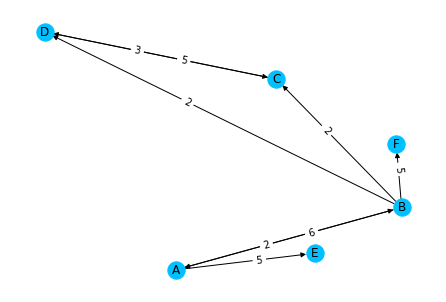

In [8]:
#Create a Toy Network
G= nx.DiGraph()
G.add_edge("A","E", weight = 5)
G.add_edge("A","B", weight = 6)
G.add_edge("B","A", weight = 2)
G.add_edge("B","F", weight = 5)
G.add_edge("B","C", weight = 2)
G.add_edge("B","D", weight = 2)
G.add_edge("C","D", weight = 3)
G.add_edge("D","C", weight = 5)
pos = nx.spiral_layout(G)
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G,pos=pos,with_labels = True,node_color='#00c0ff')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, label_pos=0.4)

In [9]:
#In directed graphs each metric has an '_in' and '_out' suffix (see the docs)
DC = distinctiveness(G, alpha = 2, normalize = False, measures = ["D1","D2","D3","D4","D5"])
DC = pd.DataFrame(DC).sort_index()
DC

,D1_in,D2_in,D3_in,D4_in,D5_in,D1_out,D2_out,D3_out,D4_out,D5_out
A,-1.01030,-0.50515,-0.108715,0.216216,0.0625,7.68867,1.39794,16.248334,11.000000,2.00
B,0.58146,0.09691,0.372887,3.540984,0.2500,5.28043,1.59176,11.418387,7.891247,2.50
C,2.48455,0.19382,7.276891,5.216216,1.0625,0.29073,0.09691,2.334454,2.076923,0.25
D,1.08661,0.19382,4.322648,3.216216,1.0625,0.48455,0.09691,3.890756,4.310345,0.25
E,0.48455,0.09691,-0.455402,2.049180,0.2500,0.00000,0.00000,0.000000,0.000000,0.00
F,-2.52575,-0.50515,1.815890,3.378378,0.0625,0.00000,0.00000,0.000000,0.000000,0.00
